In [9]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import cv2

sns.set(style='white', context='notebook', palette='deep')

In [37]:
n_filters=16
weight_decay=1e-4
num_classes=10

model=Sequential()
model.add(Conv2D(n_filters,(5,5),kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(n_filters,(5,5),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(2*n_filters,(5,5),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*n_filters, (5,5), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(4*n_filters, (5,5), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(4*n_filters, (5,5), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(4*n_filters, (5,5), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

opt = optimizers.SGD(lr = 0.001, momentum = 0.9, nesterov = True)
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 92, 92, 16)        1216      
_________________________________________________________________
batch_normalization_22 (Batc (None, 92, 92, 16)        64        
_________________________________________________________________
activation_22 (Activation)   (None, 92, 92, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 88, 88, 16)        6416      
_________________________________________________________________
batch_normalization_23 (Batc (None, 88, 88, 16)        64        
_________________________________________________________________
activation_23 (Activation)   (None, 88, 88, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 44, 44, 16)        0         
__________

In [4]:
import os

print(os.listdir("../input/gandecropped9696/train9696"))

['train9696']


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
train_files=os.listdir("../input/gandecropped9696/train9696/train9696/")
test_files=os.listdir("../input/gandecropped9696/test9696/test9696/")
random.shuffle(train_files)
# Any results you write to the current directory are saved as output.

In [12]:
train_df=pd.DataFrame()
i=0
for file in train_files :
    if file.endswith('.jpg'):
        img = cv2.imread("../input/gandecropped9696/train9696/train9696/"+file)
        st=file.split('_')
        img=img.reshape(1,96*96*3)
        #print(img.shape)
        #print(st)
        #st.pop()
        if( (not st[2].endswith('.jpg')) and len(st)==4 and (st[1]) and (st[2])) :
            df=pd.DataFrame(img)
            df[96*96*3]=int(st[1])*5+int(st[2])
            train_df=train_df.append(df)
            #print(train_df.shape)
        i=i+1
    #if(i==1):
    #    st=file.split('_')
    #    print(int(st[1])*5+int(st[2]))
print(i)
print(train_df.shape)

#train_df.to_csv('train9696.csv',index=False)
train_df.head()

23708
(23705, 27649)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27609,27610,27611,27612,27613,27614,27615,27616,27617,27618,27619,27620,27621,27622,27623,27624,27625,27626,27627,27628,27629,27630,27631,27632,27633,27634,27635,27636,27637,27638,27639,27640,27641,27642,27643,27644,27645,27646,27647,27648
0,11,12,3,15,17,11,23,27,28,26,34,41,28,42,54,30,50,67,42,64,89,65,91,121,79,108,145,86,117,162,90,121,174,99,132,188,104,136,195,105,...,9,21,27,1,11,18,7,17,24,6,12,17,2,8,13,5,9,14,9,13,18,14,19,22,19,24,27,21,26,29,19,24,27,15,20,23,12,17,20,5
0,101,114,176,100,115,177,99,117,178,97,118,179,91,117,177,88,118,177,90,121,182,93,127,187,97,130,193,98,132,192,105,136,197,108,141,197,114,144,201,118,...,196,239,226,197,240,227,198,241,228,199,242,227,200,243,228,201,244,231,201,244,231,201,244,231,201,244,231,200,242,231,199,241,230,198,239,231,198,239,231,6
0,57,63,86,62,68,91,72,78,101,76,82,105,72,80,103,77,85,108,81,91,115,80,90,114,76,87,114,68,79,106,58,70,98,54,68,96,64,77,109,71,...,74,80,99,76,80,99,77,81,100,80,81,101,81,82,102,84,83,103,85,84,104,87,85,104,88,86,105,88,86,105,88,86,105,90,89,105,92,91,107,5
0,4,4,20,5,7,25,11,12,32,13,17,41,21,25,50,29,35,64,44,49,80,52,61,95,65,73,110,74,84,124,86,95,138,89,102,148,94,106,154,99,...,15,39,81,17,38,83,16,36,83,15,35,83,13,33,81,11,30,81,12,31,82,11,33,81,10,32,80,8,32,78,7,31,77,6,33,77,9,36,80,7
0,37,42,45,49,54,57,57,61,66,58,62,67,58,62,67,57,61,66,61,64,69,68,71,76,73,76,81,76,79,83,76,79,83,69,73,74,59,64,63,51,...,43,54,81,39,49,73,32,43,65,37,43,66,50,57,76,77,83,102,106,113,128,138,141,155,128,133,142,92,98,105,66,72,77,55,60,63,42,47,50,6


In [ ]:
print(train_df.shape)

In [ ]:
#i=0
#for file in test_files :
#    if file.endswith('.jpg'):
#        img = cv2.imread("../input/gande9696/test/test/"+file)
#        st=file.split('_')
#        img=img.reshape(1,96*96*3)
#        #print(img.shape)
#        #print(st)
#        #st.pop()
#        if( (not st[2].endswith('.jpg')) and len(st)==4 and (st[1]) and (st[2])) :
#            df=pd.DataFrame(img)
#            df[96*96*3]=int(st[1])*5+int(st[2])
#            train_df=train_df.append(df)
#            #print(train_df.shape)
#        i=i+1
    #if(i==1):
    #    st=file.split('_')
    #    print(int(st[1])*5+int(st[2]))
#print(i)
#print(train_df.shape)

#train_df.to_csv('train9696new.csv',index=False)
#train_df.head()

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/"))

In [ ]:
#train_df=pd.read_csv("../input/gande-cnn2/train9696new.csv")

In [14]:
#x=train_df
X=train_df

In [15]:
X = X.reindex(np.random.permutation(X.index))

In [16]:
Y=train_df[len(train_df.columns)-1]
X=train_df.drop(train_df.columns[len(train_df.columns)-1],axis=1)
#X_train=train_df
X.head()
print(Y)

0    5
0    6
0    5
0    7
0    6
0    1
0    6
0    5
0    5
0    0
0    0
0    5
0    6
0    2
0    5
0    0
0    5
0    0
0    0
0    8
0    0
0    8
0    3
0    0
0    3
0    1
0    0
0    4
0    1
0    5
    ..
0    4
0    5
0    5
0    5
0    0
0    2
0    5
0    5
0    1
0    5
0    8
0    1
0    3
0    9
0    3
0    2
0    9
0    5
0    6
0    5
0    7
0    4
0    3
0    5
0    0
0    5
0    0
0    7
0    0
0    0
Name: 27648, Length: 23705, dtype: int64


In [ ]:
print(X.shape)
print(type(X))

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27608,27609,27610,27611,27612,27613,27614,27615,27616,27617,27618,27619,27620,27621,27622,27623,27624,27625,27626,27627,27628,27629,27630,27631,27632,27633,27634,27635,27636,27637,27638,27639,27640,27641,27642,27643,27644,27645,27646,27647
0,11,12,3,15,17,11,23,27,28,26,34,41,28,42,54,30,50,67,42,64,89,65,91,121,79,108,145,86,117,162,90,121,174,99,132,188,104,136,195,105,...,59,9,21,27,1,11,18,7,17,24,6,12,17,2,8,13,5,9,14,9,13,18,14,19,22,19,24,27,21,26,29,19,24,27,15,20,23,12,17,20
0,101,114,176,100,115,177,99,117,178,97,118,179,91,117,177,88,118,177,90,121,182,93,127,187,97,130,193,98,132,192,105,136,197,108,141,197,114,144,201,118,...,225,196,239,226,197,240,227,198,241,228,199,242,227,200,243,228,201,244,231,201,244,231,201,244,231,201,244,231,200,242,231,199,241,230,198,239,231,198,239,231
0,57,63,86,62,68,91,72,78,101,76,82,105,72,80,103,77,85,108,81,91,115,80,90,114,76,87,114,68,79,106,58,70,98,54,68,96,64,77,109,71,...,100,74,80,99,76,80,99,77,81,100,80,81,101,81,82,102,84,83,103,85,84,104,87,85,104,88,86,105,88,86,105,88,86,105,90,89,105,92,91,107
0,4,4,20,5,7,25,11,12,32,13,17,41,21,25,50,29,35,64,44,49,80,52,61,95,65,73,110,74,84,124,86,95,138,89,102,148,94,106,154,99,...,80,15,39,81,17,38,83,16,36,83,15,35,83,13,33,81,11,30,81,12,31,82,11,33,81,10,32,80,8,32,78,7,31,77,6,33,77,9,36,80
0,37,42,45,49,54,57,57,61,66,58,62,67,58,62,67,57,61,66,61,64,69,68,71,76,73,76,81,76,79,83,76,79,83,69,73,74,59,64,63,51,...,82,43,54,81,39,49,73,32,43,65,37,43,66,50,57,76,77,83,102,106,113,128,138,141,155,128,133,142,92,98,105,66,72,77,55,60,63,42,47,50


0    5477
5    4601
1    2318
3    2261
6    2208
7    1859
8    1714
2    1575
9     932
4     760
Name: 27648, dtype: int64

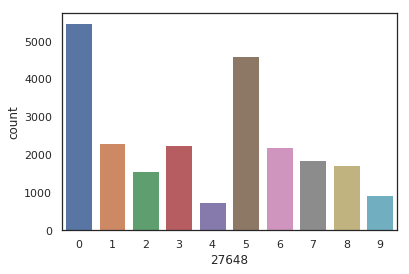

In [18]:
g = sns.countplot(Y)
Y.value_counts()

In [19]:
X.isnull().any().describe()

count     27648
unique        1
top       False
freq      27648
dtype: object

In [ ]:
del train_df

In [20]:
X = X / 255.0
#test = test / 255.0

In [ ]:
#X = X.values.reshape(-1,96,96,3)
#test = test.values.reshape(-1,28,28,1)

In [21]:
Y = to_categorical(Y, num_classes = 10)

In [ ]:
#for i in range(50):    
#    a=0
#    random_seed = 2
#    while a+10000 < X.shape[0] :
#        X_train=X.values[a:a+10000,:]
#        Y_train=Y[a:a+10000,:]
#        X_train = X_train.reshape(-1,96,96,3)
#        X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed,stratify=Y_train)
#        history = model.fit(X_train, Y_train,epochs=1, 
#              validation_data = (X_val, Y_val))
#        a=a+10000
#    X_train=X.values[a:,:]
#    Y_train=Y[a:,:]
#    X_train = X_train.reshape(-1,96,96,3)
#    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed,stratify=Y_train)
#    model.fit(X_train, Y_train,epochs=1, 
#             validation_data = (X_val, Y_val))

In [24]:
X=np.array(X)

In [33]:
def shuffle(matrix, target, test_proportion):
    ratio = matrix.shape[0]//test_proportion
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_val, Y_train, Y_val = shuffle(X, Y, 5)

In [ ]:
#random_seed = 2
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed,shuffle=False)

In [ ]:
#print(type(X_train))

In [34]:
X_train = X_train.reshape(-1,96,96,3)
X_val = X_val.reshape(-1,96,96,3)

In [ ]:
#g = sns.countplot(Y_train)
#Y_train.value_counts()
#g = sns.countplot(Y_val)
#Y_train.value_counts()

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
history = model.fit(X_train, Y_train,epochs=25, 
          validation_data = (X_val, Y_val),callbacks=[learning_rate_reduction])

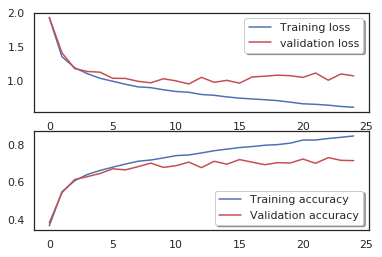

In [28]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [30]:
y_train = np.array([np.argmax(y, axis=None, out=None) for y in Y_train])
y_val = np.array([np.argmax(y, axis=None, out=None) for y in Y_val])


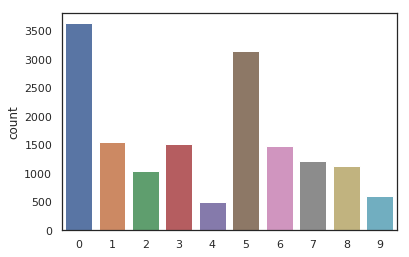

In [31]:
g = sns.countplot(y_train)

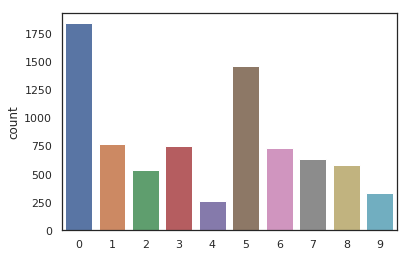

In [32]:
g = sns.countplot(y_val)

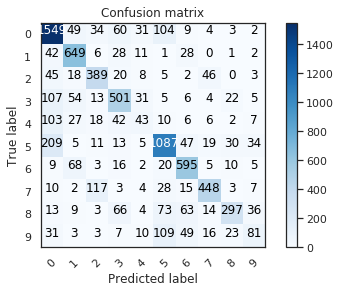

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))